In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, binom

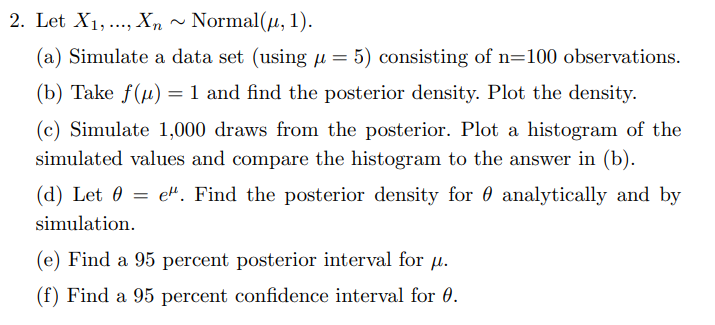

In [63]:
mu = 5
n = 100
B = 1000

x = norm.rvs(loc=mu, scale=1, size=n)
xbar = np.mean(x)

post_f1 = lambda x : norm.pdf(x, loc=xbar, scale=np.sqrt(1/n))

XSim = norm.rvs(loc=xbar, scale=1/np.sqrt(n), size=B)


print("X_1 mean = ", xbar)

X_1 mean =  4.87539761412344


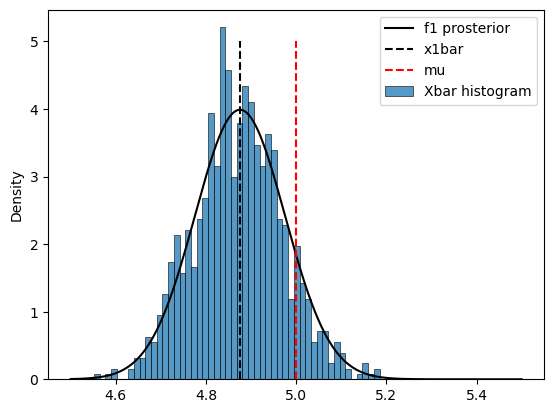

In [64]:
plotx = np.linspace(4.5, 5.5, 10000)
ploty = post_f1(plotx)

plt.plot(plotx, ploty, color='k', label='f1 prosterior')
plt.vlines(xbar, ymin=0, ymax=5, linestyles='--', color='k', label='x1bar')
plt.vlines(5, ymin=0, ymax=5, linestyles='--', color='red', label='mu')
sns.histplot(XSim, stat='density', bins=50, label='Xbar histogram')
plt.legend()
plt.show()

In [70]:
theta_postf1 = lambda x: lognorm.pdf(x, s=np.sqrt(1/n), scale=np.exp(xbar))

thetas = np.exp(XSim)

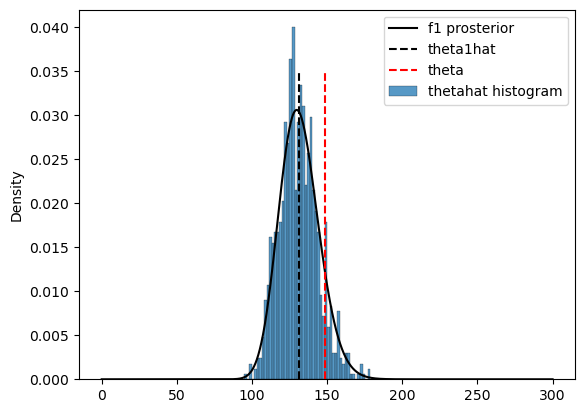

In [71]:
plotx = np.linspace(0, 300, 10000)
ploty = theta_postf1(plotx)

plt.plot(plotx, ploty, color='k', label='f1 prosterior')
plt.vlines(np.exp(xbar), ymin=0, ymax=0.035, linestyles='--', color='k', label='theta1hat')
plt.vlines(np.exp(5), ymin=0, ymax=0.035, linestyles='--', color='red', label='theta')
sns.histplot(thetas, stat='density', bins=50, label='thetahat histogram')
plt.legend()
plt.show()

In [73]:
alpha = 0.05
Cmu_analytical = (xbar + np.sqrt(1 / n) * norm.ppf(alpha / 2), xbar + np.sqrt(1 / n) * norm.ppf(1 - alpha / 2))
Cmu_simulation = (np.quantile(XSim, alpha / 2), np.quantile(XSim, 1 - alpha / 2))
#Ctheta = 
print(Cmu_analytical)
print(Cmu_simulation)

(4.679401215669434, 5.071394012577445)
(4.6885937683955765, 5.066923954052789)


In [78]:
Ctheta_analytical = np.exp(Cmu_analytical)
Ctheta_simulation = np.exp(Cmu_simulation)

print(Ctheta_analytical)
print(Ctheta_simulation)

[107.70556086 159.39637309]
[108.7002146  158.68545209]


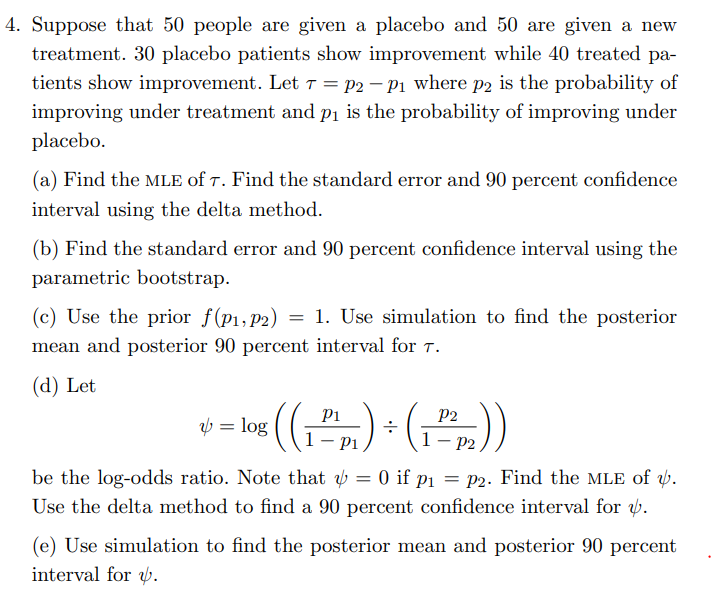

In [144]:
n1 = 50
n2 = 50

X1 = 30
X2 = 40


p1hat = X1 / n1
p2hat = X2 / n2

tauhat = p2hat - p1hat

tause = np.sqrt(p1hat * (1 - p1hat) / n1 + p2hat * (1 - p2hat) / n2)

print("tau estimate = ", tauhat)
print("standard error = ", tause)

tau estimate =  0.20000000000000007
standard error =  0.08944271909999159


In [145]:
alpha = 0.1

C = (tauhat + tause * norm.ppf(alpha / 2), tauhat + tause * norm.ppf(1 - alpha / 2))
print("analytical confidence interval = ", C)

analytical confidence interval =  (0.052879819083977125, 0.3471201809160229)


In [146]:
B = 1000

X1Boot = binom.rvs(n=n1, p=p1hat, size=B)
X2Boot = binom.rvs(n=n1, p=p2hat, size=B)

p1Boot = X1Boot / n1
p2Boot = X2Boot / n2

tauBoot = p1Boot - p2Boot

seBoot = np.std(tauBoot)

In [147]:
C = (tauhat + seBoot * norm.ppf(alpha / 2), tauhat + seBoot * norm.ppf(1 - alpha / 2))
print("simulation confidence interval = ", C)

simulation confidence interval =  (0.05695463123274905, 0.343045368767251)


In [148]:
from scipy.stats import beta

In [149]:
fpost = lambda x, y: beta.pdf(x, X1-1, n1-X1-1) * beta.pdf(y, X2-1, n2-X2-1)
fpostx1 = lambda x: beta.pdf(x, X1-1, n1-X1-1)
fposty2 = lambda y: beta.pdf(y, X2-1, n2-X2-1)

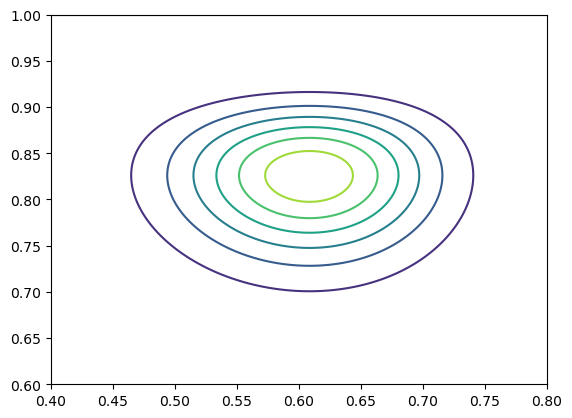

In [150]:
plotx, ploty = np.meshgrid(np.linspace(0.4, 0.8, 1000), np.linspace(0.6, 1, 1000))
plotf = fpost(plotx, ploty)
#print(plotxy.shape, plotf.shape)

plt.contour(np.linspace(0.4, 0.8, 1000), np.linspace(0.6, 1, 1000), plotf)
plt.show()

In [151]:
B=1000

p1Sim = beta.rvs(X1 - 1, n1 - X1 - 1, size = B)
p2Sim = beta.rvs(X2 - 1, n2 - X2 - 1, size = B)

tauSim = p2Sim - p1Sim

postmeansim = np.mean(tauSim)
postsesim = np.std(tauSim)

print("simulation mean = ", postmeansim)
print("simulation se = ", postsesim)

CSim = (np.quantile(tauSim, alpha/2), np.quantile(tauSim, 1 - alpha / 2))
print("simulation confidence interval = ", CSim)

simulation mean =  0.21103179037768316
simulation se =  0.08798600572558284
simulation confidence interval =  (0.06986889584097439, 0.3509681692525699)


psihat delta method

In [152]:
psihat = np.log(p1hat * (1 - p2hat) / (p2hat * (1 - p1hat)))
print(psihat)

sedelta = np.sqrt( (1 / (n1 * p1hat * (1 - p1hat))) + (1 / (n2 * p2hat * (1 - p2hat))))
print(sedelta)

Cdelta = (psihat + norm.ppf(alpha / 2) * sedelta, psihat + norm.ppf (1 - alpha / 2) * sedelta)
print(Cdelta)

-0.9808292530117266
0.45643546458763845
(-1.7315987824079841, -0.23005972361546922)


In [153]:
psiSim = np.log(p1Sim * (1 - p2Sim) / (p2Sim * (1 - p1Sim)))

psibarSim = np.mean(psiSim)
psiseSim = np.std(psiSim)

print(psibarSim)
print(psiseSim)

CBayes = (np.quantile(psiSim, alpha /2), np.quantile(psiSim, 1 - alpha /2))
print(CBayes)

-1.0822249890404434
0.47110428233269197
(-1.8684814846870066, -0.3412303032114684)


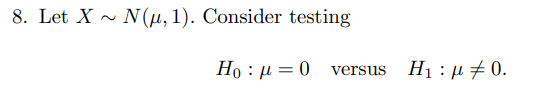
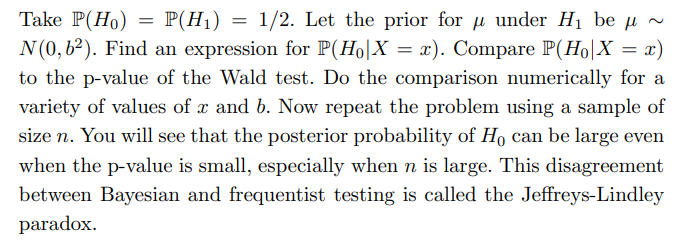

In [43]:
n=1000


mu = 0.1
X = norm.rvs(loc=0.1, size=n)

xbar = np.mean(X)

b = np.logspace(-3, 4, 1000)
sigma = np.sqrt(b ** 2 /(1 +  (n * b ** 2)))

#this part has numerical problems due to multiplying large and small numbers
denomterm = np.exp(((sigma * xbar * n)**2)/2)  * (sigma / b)
demonterm = denomterm * ((2 * np.pi) ** (-(n - 1) /4)) * ((2 * np.pi) ** (-(n - 1) /4))

f = 1. / (1. + denomterm)

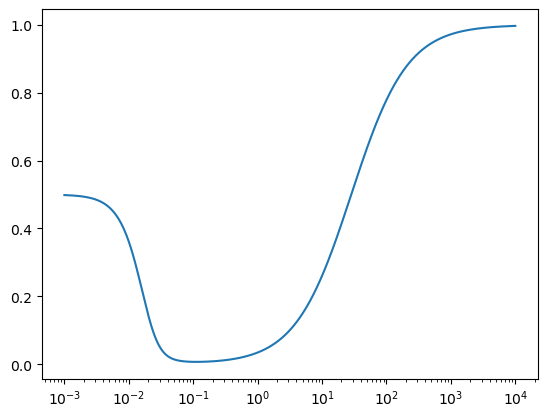

In [44]:
plt.plot(b, f)
plt.xscale('log')